In [1]:
import pyspark
from pyspark.sql.functions import avg,stddev,min,max,count
from pyspark.sql.functions import col

weather_df = spark.read.csv(
    "/Users/mac/Desktop/jpm/weather.csv", header=True, mode="DROPMALFORMED")
raw_df = spark.read.csv(
    "/Users/mac/Desktop/jpm/raw_trip.csv", header=True, mode="DROPMALFORMED"
)

In [2]:
cd facts

/Users/mac/Desktop/cab/facts


In [3]:
ls

about_efficiency/                trip_eff_wd.csv
about_efficiency_speed_distance/ trip_eff_wd_h.csv
about_tip/                       trip_gain_date.csv
about_volume/                    trip_gain_month.csv


In [359]:
weather_df.count()

29999

In [47]:
raw_df.count()

45299607

In [91]:
raw_df.dtypes

[('_c0', 'string'),
 ('index', 'string'),
 ('Extra', 'double'),
 ('Fare_amount', 'double'),
 ('Holiday', 'string'),
 ('MTA_tax', 'double'),
 ('Passenger_count', 'double'),
 ('Payment_type', 'string'),
 ('RateCodeID', 'string'),
 ('Store_and_fwd_flag', 'string'),
 ('Tip_amount', 'double'),
 ('Tolls_amount', 'double'),
 ('Total_amount', 'double'),
 ('Trip_distance', 'double'),
 ('Trip_type', 'string'),
 ('date', 'string'),
 ('day', 'string'),
 ('hour', 'string'),
 ('improvement_surcharge', 'double'),
 ('interval_min', 'double'),
 ('month', 'string'),
 ('weekofday', 'string'),
 ('year', 'string')]

In [103]:
weather_df.dtypes

[('_c0', 'string'),
 ('temp', 'string'),
 ('icon', 'string'),
 ('windBearing', 'string'),
 ('windSpeed', 'string'),
 ('visibility', 'string'),
 ('hour_w', 'string'),
 ('date_w', 'string')]

### Modify Data Type

In [4]:
from pyspark.sql.types import DoubleType

weather_df = weather_df.withColumn("temp", weather_df["temp"].cast(DoubleType()))
weather_df = weather_df.withColumn("windBearing", weather_df["windBearing"].cast(DoubleType()))
weather_df = weather_df.withColumn("windSpeed", weather_df["windSpeed"].cast(DoubleType()))
weather_df = weather_df.withColumn("visibility", weather_df["visibility"].cast(DoubleType()))
weather_df = weather_df.withColumn("windBearing", weather_df["windBearing"].cast(DoubleType()))
raw_df = raw_df.withColumn("Extra", raw_df["Extra"].cast(DoubleType()))
raw_df = raw_df.withColumn("Fare_amount", raw_df["Fare_amount"].cast(DoubleType()))
raw_df = raw_df.withColumn("MTA_tax", raw_df["MTA_tax"].cast(DoubleType()))
raw_df = raw_df.withColumn("Passenger_count", raw_df["Passenger_count"].cast(DoubleType()))
raw_df = raw_df.withColumn("Tip_amount", raw_df["Tip_amount"].cast(DoubleType()))
raw_df = raw_df.withColumn("Tolls_amount", raw_df["Tolls_amount"].cast(DoubleType()))
raw_df = raw_df.withColumn("Total_amount", raw_df["Total_amount"].cast(DoubleType()))
raw_df = raw_df.withColumn("Trip_distance", raw_df["Trip_distance"].cast(DoubleType()))
raw_df = raw_df.withColumn("improvement_surcharge", raw_df["improvement_surcharge"].cast(DoubleType()))
raw_df = raw_df.withColumn("interval_min", raw_df["interval_min"].cast(DoubleType()))

In [5]:
weather_df.registerTempTable('weather')
raw_df.registerTempTable('raw_trip')

### Floats Transformation

In [6]:
col_to_change = ['Extra',
                 'Fare_amount',
                 'MTA_tax',
                 'Tip_amount',
                 'Tolls_amount',
                 'Total_amount',
                 'Trip_distance',
                 'improvement_surcharge',]
from pyspark.sql.functions import abs

transform_df = sqlContext.sql("SELECT *, abs(Extra) as Extra_abs,abs(Fare_amount) as Fare_amount_abs,\
                                      abs(MTA_tax) as MTA_tax_abs,abs(Tip_amount) as Tip_amount_abs,\
                                      abs(Tolls_amount) as Tolls_amount_abs,\
                                      abs(Total_amount) as Total_amount_abs,\
                                      abs(Trip_distance) as Trip_distance_abs\
                                      from raw_trip")
transform_df.registerTempTable('transform_trip')

In [12]:
transform_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- index: string (nullable = true)
 |-- Extra: double (nullable = true)
 |-- Fare_amount: double (nullable = true)
 |-- Holiday: string (nullable = true)
 |-- MTA_tax: double (nullable = true)
 |-- Passenger_count: double (nullable = true)
 |-- Payment_type: string (nullable = true)
 |-- RateCodeID: string (nullable = true)
 |-- Store_and_fwd_flag: string (nullable = true)
 |-- Tip_amount: double (nullable = true)
 |-- Tolls_amount: double (nullable = true)
 |-- Total_amount: double (nullable = true)
 |-- Trip_distance: double (nullable = true)
 |-- Trip_type: string (nullable = true)
 |-- date: string (nullable = true)
 |-- day: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- interval_min: double (nullable = true)
 |-- month: string (nullable = true)
 |-- weekofday: string (nullable = true)
 |-- year: string (nullable = true)
 |-- Extra_abs: double (nullable = true)
 |-- Fa

In [6]:
trip_gain_month = transform_df.groupBy(*['year','month']).agg(*[avg(col('Fare_amount_abs'))]).toPandas()
trip_gain_month.to_csv('trip_gain_month.csv')

In [7]:
trip_gain_month.head()

,year,month,avg(Fare_amount_abs)
0,2014,2,12.017728
1,2014,11,12.369709
2,2014,8,12.785319
3,2014,5,12.913300
4,2014,12,12.288316


In [16]:
cd about_efficiency

about_efficiency/                about_volume/
about_efficiency_speed_distance/ trip_gain_date.csv
about_tip/                       trip_gain_month.csv


In [20]:
transform_df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- index: string (nullable = true)
 |-- Extra: double (nullable = true)
 |-- Fare_amount: double (nullable = true)
 |-- Holiday: string (nullable = true)
 |-- MTA_tax: double (nullable = true)
 |-- Passenger_count: double (nullable = true)
 |-- Payment_type: string (nullable = true)
 |-- RateCodeID: string (nullable = true)
 |-- Store_and_fwd_flag: string (nullable = true)
 |-- Tip_amount: double (nullable = true)
 |-- Tolls_amount: double (nullable = true)
 |-- Total_amount: double (nullable = true)
 |-- Trip_distance: double (nullable = true)
 |-- Trip_type: string (nullable = true)
 |-- date: string (nullable = true)
 |-- day: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- interval_min: double (nullable = true)
 |-- month: string (nullable = true)
 |-- weekofday: string (nullable = true)
 |-- year: string (nullable = true)
 |-- Extra_abs: double (nullable = true)
 |-- Fa

In [10]:
trip_gain_date = transform_df.groupBy(['date']).agg(avg(col('Fare_amount_abs')))
trip_gain_date = trip_gain_date.toPandas()
trip_gain_date.to_csv('trip_gain_date.csv')

In [11]:
trip_gain_date.head()

,date,avg(Fare_amount_abs)
0,2013-10-23 00:00:00,12.071924
1,2014-02-18 00:00:00,11.661606
2,2015-04-20 00:00:00,11.894408
3,2015-05-26 00:00:00,12.575286
4,2015-06-23 00:00:00,12.267984


# Trip Count Segmentation

In [7]:
merge = sqlContext.sql("SELECT * from raw_trip r right join weather w where r.date = w.date_w and r.hour = w.hour_w")
merge.registerTempTable('merge')

In [111]:
count_trip = merge.groupBy(['year','month','weekofday','hour','Holiday','Payment_type','RateCodeID','icon']).count()
count_trip_pd = count_trip.toPandas()
count_trip_pd.to_csv('count_trip.csv')

In [9]:
count_trip_date = merge.groupBy(['date']).count()
count_trip_date = count_trip_date.toPandas()
count_trip_date.to_csv('count_trip_daily.csv')

In [10]:
count_trip_date.head()

,date,count
0,2013-10-23 00:00:00,6620
1,2014-02-18 00:00:00,28463
2,2015-04-20 00:00:00,46724
3,2015-05-26 00:00:00,44578
4,2015-06-23 00:00:00,47747


In [28]:
count_h_h = merge.groupBy(['hour','Holiday']).count()
count_h_h = count_h_h.toPandas()
count_h_h.to_csv('count_h_h.csv')

In [29]:
count_h_h.head()

,hour,Holiday,count
0,15,0,2122638
1,7,1,19845
2,4,1,29563
3,9,0,1735232
4,5,1,19738


In [7]:
cd about_volume

/Users/mac/Desktop/jp/facts/about_volume


In [8]:
count_R_i_h = merge.groupBy(['RateCodeID','icon','hour']).count()
count_R_i_h = count_R_i_h.toPandas()
count_R_i_h.to_csv('count_R_i_h.csv')

In [9]:
count_R_i_h.head()

,RateCodeID,icon,hour,count
0,1,clear-night,0,1659840
1,2,rain,17,715
2,3,partly-cloudy-night,19,201
3,2,fog,9,156
4,1,snow,10,21291


In [10]:
count_R_i_holiday = merge.groupBy(['RateCodeID','icon','holiday']).count()
count_R_i_holiday = count_R_i_holiday.toPandas()
count_R_i_holiday.to_csv('count_R_i_holiday.csv')

In [11]:
count_R_i_holiday.head()

,RateCodeID,icon,holiday,count
0,1,clear-night,0,12669456
1,99,partly-cloudy-night,0,5
2,3,cloudy,0,1921
3,5,partly-cloudy-day,1,2460
4,2,wind,1,130


In [9]:
count_h_i = merge.groupBy(['hour','icon']).count()
count_h_i = count_h_i.toPandas()
count_h_i.to_csv('count_h_i.csv')

In [10]:
count_h_i.head()

,hour,icon,count
0,5,cloudy,49533
1,11,wind,94334
2,3,wind,23886
3,6,partly-cloudy-night,40247
4,1,wind,49389


In [13]:
count_R_i_w = merge.groupBy(['RateCodeID','icon','weekofday']).count()
count_R_i_w = count_R_i_w.toPandas()
count_R_i_w.to_csv('count_R_i_w.csv')

In [14]:
count_R_i_w.head()

,RateCodeID,icon,weekofday,count
0,1,clear-night,0,1330997
1,99,partly-cloudy-day,6,3
2,1,rain,4,375977
3,4,clear-night,5,1474
4,3,cloudy,0,265


**count_trip.csv**

In [138]:
count_trip_pd.head()

,year,month,weekofday,hour,Holiday,Payment_type,RateCodeID,icon,count
0,2013,9,2,14,0,None,3,partly-cloudy-day,2
1,2013,9,0,6,0,None,5,clear-night,6
2,2013,9,0,8,0,None,1,cloudy,54
3,2013,9,1,0,0,None,2,wind,2
4,2013,9,1,4,0,None,2,clear-night,1


### Speed Limit Filtering

In [8]:
query = """SELECT *, Trip_distance_abs/interval_min AS speed,Fare_amount_abs/interval_min AS Efficiency from transform_trip where interval_min>0 and Trip_distance_abs/interval_min < 1.25 and Trip_distance_abs/interval_min>0.17 and Trip_distance_abs/interval_min>0"""
new_df = sqlContext.sql(query)
new_df.registerTempTable('new_trip')
merge_0 = sqlContext.sql("SELECT * from new_trip r right join weather w where r.date = w.date_w and r.hour = w.hour_w")
merge_0.registerTempTable('merge_0')

In [23]:
merge_0.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- index: string (nullable = true)
 |-- Extra: double (nullable = true)
 |-- Fare_amount: double (nullable = true)
 |-- Holiday: string (nullable = true)
 |-- MTA_tax: double (nullable = true)
 |-- Passenger_count: double (nullable = true)
 |-- Payment_type: string (nullable = true)
 |-- RateCodeID: string (nullable = true)
 |-- Store_and_fwd_flag: string (nullable = true)
 |-- Tip_amount: double (nullable = true)
 |-- Tolls_amount: double (nullable = true)
 |-- Total_amount: double (nullable = true)
 |-- Trip_distance: double (nullable = true)
 |-- Trip_type: string (nullable = true)
 |-- date: string (nullable = true)
 |-- day: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- interval_min: double (nullable = true)
 |-- month: string (nullable = true)
 |-- weekofday: string (nullable = true)
 |-- year: string (nullable = true)
 |-- Extra_abs: double (nullable = true)
 |-- Fa

# Trip Distance/Speed/Profitability/Tip_percentage Segmentation

In [263]:
stats_wd = (merge_0
               .groupBy('weekofday')
               .agg(count('date'),
                    avg('Trip_distance_abs'),
                    stddev('Trip_distance_abs'),
                    min('Trip_distance_abs'),
                    max('Trip_distance_abs'),
                    avg('speed'),
                    stddev('speed'),
                    min('speed'),
                    max('speed'),
                    avg('Efficiency'),
                    stddev('Efficiency'),
                    min('Efficiency'),
                    max('Efficiency')))
stats_holiday = (merge_0
               .groupBy('Holiday')
               .agg(count('date'),
                    avg('Trip_distance_abs'),
                    stddev('Trip_distance_abs'),
                    min('Trip_distance_abs'),
                    max('Trip_distance_abs'),
                    avg('speed'),
                    stddev('speed'),
                    min('speed'),
                    max('speed'),
                    avg('Efficiency'),
                    stddev('Efficiency'),
                    min('Efficiency'),
                    max('Efficiency')))
stats_RateCodeID = (merge_0
               .groupBy('RateCodeID')
               .agg(count('date'),
                    avg('Trip_distance_abs'),
                    stddev('Trip_distance_abs'),
                    min('Trip_distance_abs'),
                    max('Trip_distance_abs'),
                    avg('speed'),
                    stddev('speed'),
                    min('speed'),
                    max('speed'),
                    avg('Efficiency'),
                    stddev('Efficiency'),
                    min('Efficiency'),
                    max('Efficiency')))
stats_icon = (merge_0
               .groupBy('icon')
               .agg(count('date'),
                    avg('Trip_distance_abs'),
                    stddev('Trip_distance_abs'),
                    min('Trip_distance_abs'),
                    max('Trip_distance_abs'),
                    avg('speed'),
                    stddev('speed'),
                    min('speed'),
                    max('speed'),
                    avg('Efficiency'),
                    stddev('Efficiency'),
                    min('Efficiency'),
                    max('Efficiency')))
stats_hour = (merge_0
               .groupBy('hour')
               .agg(count('date'),
                    avg('Trip_distance_abs'),
                    stddev('Trip_distance_abs'),
                    min('Trip_distance_abs'),
                    max('Trip_distance_abs'),
                    avg('speed'),
                    stddev('speed'),
                    min('speed'),
                    max('speed'),
                    avg('Efficiency'),
                    stddev('Efficiency'),
                    min('Efficiency'),
                    max('Efficiency')))
stats_hour = stats_hour.toPandas()
stats_wd_pd = stats_wd.toPandas()
stats_holiday = stats_holiday.toPandas()
stats_RateCodeID = stats_RateCodeID.toPandas()
stats_icon = stats_icon.toPandas()

In [265]:
stats_wd_pd

,weekofday,count(date),avg(Trip_distance_abs),stddev_samp(Trip_distance_abs),min(Trip_distance_abs),max(Trip_distance_abs),avg(speed),stddev_samp(speed),min(speed),max(speed),avg(Efficiency),stddev_samp(Efficiency),min(Efficiency),max(Efficiency)
0,3,3954340,3.488736,3.346176,0.01,259.69,0.253703,0.087602,0.170004,1.246154,1.599027,26.682601,0.0,14970.0
1,0,3457056,3.466248,3.376326,0.01,391.09,0.259400,0.091718,0.170004,1.250000,1.615508,25.728010,0.0,19800.0
2,5,5505352,3.595964,3.193171,0.01,439.53,0.257717,0.088984,0.170003,1.248000,1.454894,24.031323,0.0,14520.0
3,6,5062876,3.583486,3.239518,0.01,375.64,0.264652,0.093057,0.170004,1.248000,1.469582,21.327574,0.0,9960.0
4,1,3329778,3.424029,3.299229,0.01,360.50,0.254577,0.088457,0.170004,1.248322,1.619615,25.581090,0.0,14850.0
5,4,4386018,3.565711,3.375077,0.01,659.58,0.254011,0.087780,0.170003,1.249180,1.618024,29.599458,0.0,23400.0
6,2,3487411,3.435510,3.301082,0.01,339.53,0.253860,0.087812,0.170004,1.246957,1.634247,25.865944,0.0,11250.0


In [272]:
stats_holiday

,Holiday,count(date),avg(Trip_distance_abs),stddev_samp(Trip_distance_abs),min(Trip_distance_abs),max(Trip_distance_abs),avg(speed),stddev_samp(speed),min(speed),max(speed),avg(Efficiency),stddev_samp(Efficiency),min(Efficiency),max(Efficiency)
0,0,28383717,3.519583,3.296219,0.01,659.58,0.256803,0.089236,0.170003,1.24918,1.560694,25.513836,0.0,23400.0
1,1,799114,3.555395,3.337221,0.01,280.46,0.271289,0.099261,0.170005,1.25000,1.562539,24.109822,0.0,9300.0


In [273]:
stats_RateCodeID

,RateCodeID,count(date),avg(Trip_distance_abs),stddev_samp(Trip_distance_abs),min(Trip_distance_abs),max(Trip_distance_abs),avg(speed),stddev_samp(speed),min(speed),max(speed),avg(Efficiency),stddev_samp(Efficiency),min(Efficiency),max(Efficiency)
0,3,19229,17.321800,9.785106,0.01,185.72,0.473361,0.189388,0.170017,1.241379,14.979680,62.647959,0.000000,1200.000000
1,5,517712,5.249665,5.770916,0.01,659.58,0.318663,0.155891,0.170004,1.248000,16.375323,165.222625,0.000000,23400.000000
2,6,323,1.738390,2.852065,0.03,26.80,0.345443,0.207703,0.170127,1.114286,4.275484,6.086712,0.030199,41.250000
3,1,28538848,3.434502,3.075283,0.01,439.53,0.255183,0.085916,0.170003,1.250000,1.120600,1.770265,0.000000,6000.000000
4,4,18832,14.730896,13.085966,0.10,391.09,0.465544,0.164477,0.170023,1.229682,1.857019,0.738576,0.000000,21.428571
5,2,87887,15.866177,6.656956,0.01,61.19,0.457766,0.160906,0.170040,1.247525,54.208504,220.606501,0.000000,3120.000000


In [274]:
stats_icon

,icon,count(date),avg(Trip_distance_abs),stddev_samp(Trip_distance_abs),min(Trip_distance_abs),max(Trip_distance_abs),avg(speed),stddev_samp(speed),min(speed),max(speed),avg(Efficiency),stddev_samp(Efficiency),min(Efficiency),max(Efficiency)
0,fog,297756,3.619020,3.406005,0.01,217.31,0.260155,0.092569,0.170005,1.245283,1.677254,20.733542,0.0,3300.0
1,partly-cloudy-day,3329346,3.643037,3.474877,0.01,383.64,0.248950,0.084855,0.170004,1.246957,1.665982,33.814042,0.0,23400.0
2,clear-day,7699392,3.659057,3.481689,0.01,378.91,0.251497,0.087595,0.170003,1.250000,1.669084,28.344188,0.0,14670.0
3,rain,1858622,3.422077,3.251687,0.01,246.28,0.250300,0.083107,0.170004,1.248322,1.546275,24.087152,0.0,14970.0
4,cloudy,1606683,3.492120,3.292239,0.01,439.53,0.257702,0.090350,0.170004,1.246875,1.566665,24.059377,0.0,14850.0
5,clear-night,10255704,3.426026,3.141099,0.01,659.58,0.264397,0.092453,0.170004,1.248322,1.465904,21.674929,0.0,14940.0
6,wind,1476106,3.401497,3.228376,0.01,165.00,0.251115,0.085021,0.170004,1.247442,1.519724,20.646488,0.0,8400.0
7,partly-cloudy-night,2473355,3.462771,3.132064,0.01,216.40,0.264947,0.093285,0.170004,1.248000,1.477454,21.454777,0.0,12000.0
8,snow,185867,3.593777,3.328405,0.01,116.18,0.249177,0.084762,0.170005,1.238095,1.761855,34.882035,0.0,7470.0


In [275]:
stats_hour

,hour,count(date),avg(Trip_distance_abs),stddev_samp(Trip_distance_abs),min(Trip_distance_abs),max(Trip_distance_abs),avg(speed),stddev_samp(speed),min(speed),max(speed),avg(Efficiency),stddev_samp(Efficiency),min(Efficiency),max(Efficiency)
0,7,801817,3.974920,3.669640,0.01,280.46,0.269839,0.101838,0.170005,1.248322,1.764961,21.594545,0.0,5400.0
1,15,1108141,3.787145,3.717672,0.01,310.99,0.240478,0.075260,0.170004,1.246957,1.692932,31.939650,0.0,14970.0
2,11,1014436,3.660501,3.463422,0.01,257.50,0.256683,0.093680,0.170004,1.250000,1.667468,27.400799,0.0,10800.0
3,3,785790,3.523302,3.268273,0.01,164.31,0.282668,0.103026,0.170007,1.241379,1.484296,19.346046,0.0,6000.0
4,8,1001491,3.757427,3.528349,0.01,439.53,0.256906,0.093542,0.170004,1.246154,1.774663,21.006835,0.0,4200.0
5,22,1949244,3.364175,2.970189,0.01,217.21,0.257864,0.084829,0.170007,1.245283,1.389487,18.674061,0.0,8260.0
6,16,1174825,3.678553,3.613500,0.01,346.96,0.236211,0.071058,0.170004,1.246753,1.667224,29.453047,0.0,9300.0
7,0,1680373,3.327232,2.948597,0.01,240.39,0.265643,0.089445,0.170005,1.248000,1.426450,17.271410,0.0,7000.0
8,5,444179,4.507570,4.271574,0.01,267.47,0.324277,0.130090,0.170006,1.246753,1.768086,18.752871,0.0,3120.0
9,18,1589869,3.339194,3.146385,0.01,297.06,0.236342,0.070431,0.170004,1.247458,1.574703,30.999141,0.0,14520.0


In [276]:
stats_wd_pd.to_csv('stats_wd.csv')
stats_RateCodeID.to_csv('stats_RateCodeID.csv')
stats_icon.to_csv('stats_icon.csv')
stats_holiday.to_csv('stats_holiday.csv')
stats_hour.to_csv('stats_hour.csv')

**Tip Only for Credit Card**

In [12]:
daily_paytype = merge_0.groupBy(['date','Payment_type']).count()
daily_paytype = daily_paytype.toPandas()
daily_paytype.to_csv('daily_paytype.csv')

In [13]:
daily_paytype.head()

,date,Payment_type,count
0,2013-10-23 00:00:00,None,4564
1,2014-02-18 00:00:00,None,4136
2,2014-07-01 00:00:00,1.0,26229
3,2014-09-12 00:00:00,1.0,31209
4,2014-11-18 00:00:00,2.0,496


[TIP](https://www.bloomberg.com/news/articles/2014-07-31/heres-how-much-you-should-be-tipping-your-cab-driver)

* For those who tip:

In [20]:
# some tip percentage go over thousands
# only 2015 2016 because 13 14 different
merge_tip = sqlContext.sql("SELECT *, Tip_amount_abs/Fare_amount_abs AS Tip_percentage \
from merge_0 \
where Payment_type='1.0'and \
Tip_amount_abs/Fare_amount_abs<1 and \
Tip_amount_abs!=0.0 and \
year IN {0}".format(("2015", "2016")))

In [11]:
cd about_tip

/Users/mac/Desktop/cab/facts/about_tip


In [21]:
tip_wd = (merge_tip
               .groupBy('weekofday')
               .agg(count('date'),
                    avg('Tip_percentage'),
                    stddev('Tip_percentage'),
                    min('Tip_percentage'),
                    max('Tip_percentage')))
tip_Holiday = (merge_tip
               .groupBy('Holiday')
               .agg(count('date'),
                    avg('Tip_percentage'),
                    stddev('Tip_percentage'),
                    min('Tip_percentage'),
                    max('Tip_percentage')))
tip_RateCodeID = (merge_tip
               .groupBy('RateCodeID')
               .agg(count('date'),
                    avg('Tip_percentage'),
                    stddev('Tip_percentage'),
                    min('Tip_percentage'),
                    max('Tip_percentage')))
tip_icon = (merge_tip
               .groupBy('icon')
               .agg(count('date'),
                    avg('Tip_percentage'),
                    stddev('Tip_percentage'),
                    min('Tip_percentage'),
                    max('Tip_percentage')))
tip_hour = (merge_tip
               .groupBy('hour')
               .agg(count('date'),
                    avg('Tip_percentage'),
                    stddev('Tip_percentage'),
                    min('Tip_percentage'),
                    max('Tip_percentage')))

In [22]:
tip_wd = tip_wd.toPandas()
tip_hour = tip_hour.toPandas()
tip_icon = tip_icon.toPandas()
tip_RateCodeID = tip_RateCodeID.toPandas()
tip_Holiday = tip_Holiday.toPandas()

In [23]:
tip_wd

,weekofday,count(date),avg(Tip_percentage),stddev_samp(Tip_percentage),min(Tip_percentage),max(Tip_percentage)
0,3,1040264,0.224198,0.079295,0.000110,0.990099
1,0,882293,0.222633,0.079064,0.000081,0.998734
2,5,1453750,0.219217,0.074745,0.000091,0.996774
3,6,1338994,0.218727,0.074242,0.000060,0.997500
4,1,838542,0.223851,0.079621,0.000128,0.996667
5,4,1131123,0.223181,0.078583,0.000100,0.986667
6,2,868662,0.223747,0.079144,0.000051,0.992556


In [24]:
tip_hour

,hour,count(date),avg(Tip_percentage),stddev_samp(Tip_percentage),min(Tip_percentage),max(Tip_percentage)
0,7,240823,0.208652,0.076118,0.000103,0.983607
1,15,248698,0.214410,0.075974,0.000105,0.996516
2,11,251417,0.213315,0.075858,0.000110,0.997500
3,3,188274,0.226501,0.080062,0.000051,0.977778
4,8,299935,0.210614,0.075687,0.000154,0.975610
5,22,533893,0.227044,0.075888,0.000098,0.983607
6,16,272654,0.222739,0.079289,0.000109,0.978947
7,0,448311,0.227837,0.076726,0.000112,0.996667
8,5,106569,0.214735,0.081145,0.000083,0.998734
9,18,413374,0.227543,0.078498,0.000145,0.983333


In [25]:
tip_icon

,icon,count(date),avg(Tip_percentage),stddev_samp(Tip_percentage),min(Tip_percentage),max(Tip_percentage)
0,fog,69502,0.219446,0.076953,0.000192,0.960000
1,partly-cloudy-day,848199,0.217386,0.077308,0.000057,0.990099
2,clear-day,1994001,0.216310,0.076793,0.000103,0.997500
3,rain,439377,0.223784,0.078647,0.000083,0.989899
4,cloudy,404299,0.222816,0.077900,0.000096,0.998734
5,clear-night,2686210,0.225782,0.077365,0.000051,0.996889
6,wind,400817,0.223830,0.078092,0.000068,0.987654
7,partly-cloudy-night,648903,0.225337,0.077387,0.000060,0.994318
8,snow,62320,0.223347,0.078850,0.000192,0.983607


In [26]:
tip_RateCodeID

,RateCodeID,count(date),avg(Tip_percentage),stddev_samp(Tip_percentage),min(Tip_percentage),max(Tip_percentage)
0,3,7215,0.211205,0.083557,0.000060,0.979570
1,5,32653,0.189116,0.090107,0.000051,0.993500
2,6,3,0.272364,0.050600,0.229091,0.328000
3,1,7480697,0.222069,0.077375,0.000057,0.998734
4,4,5359,0.197036,0.094844,0.000083,0.913242
5,2,27701,0.207116,0.071923,0.000192,0.976923


In [27]:
tip_Holiday

,Holiday,count(date),avg(Tip_percentage),stddev_samp(Tip_percentage),min(Tip_percentage),max(Tip_percentage)
0,0,7355194,0.221865,0.077453,0.000051,0.998734
1,1,198434,0.221077,0.078238,0.000083,0.986667


In [28]:
tip_wd.to_csv('tip_wd.csv')
tip_hour.to_csv('tip_hour.csv')
tip_icon.to_csv('tip_icon.csv')
tip_RateCodeID.to_csv('tip_RateCodeID.csv')
tip_Holiday.to_csv('tip_Holiday.csv')

* For those don't tip

In [16]:
merge_not_tip = sqlContext.sql("SELECT *, Tip_amount_abs!=0 as not_tip \
from merge_0 where Payment_type='1.0'and \
year IN {0}".format(("2015", "2016"))) 
merge_not_tip.registerTempTable('merge_not_tip')

In [17]:
merge_not_tip.take(1)

[Row(_c0='57023', index='49400', Extra=0.0, Fare_amount=16.0, Holiday='0', MTA_tax=0.0, Passenger_count=1.0, Payment_type='1.0', RateCodeID='5', Store_and_fwd_flag='N', Tip_amount=0.0, Tolls_amount=0.0, Total_amount=2.0, Trip_distance=7.56, Trip_type=None, date='2013-09-30 00:00:00', day='30', hour='21', improvement_surcharge=16.0, interval_min=16.01666666666667, month='9', weekofday='0', year='2013', Extra_abs=0.0, Fare_amount_abs=16.0, MTA_tax_abs=0.0, Tip_amount_abs=0.0, Tolls_amount_abs=0.0, Total_amount_abs=2.0, Trip_distance_abs=7.56, speed=0.47200832466181053, Efficiency=0.9989594172736731, _c0='6504', temp=64.69, icon='clear-night', windBearing=193.0, windSpeed=7.04, visibility=10.0, hour_w='21', date_w='2013-09-30 00:00:00', not_tip=False)]

In [20]:
not_tip_date = merge_not_tip.groupby(*['date','not_tip']).agg(*[count(col('date'))]).toPandas()
not_tip_wd = merge_not_tip.groupby(*['weekofday','not_tip']).agg(*[count(col('date'))]).toPandas()
not_tip_Holiday = merge_not_tip.groupby(*['Holiday','not_tip']).agg(*[count(col('date'))]).toPandas()
not_tip_RateCodeID = merge_not_tip.groupby(*['RateCodeID','not_tip']).agg(*[count(col('date'))]).toPandas()
not_tip_icon = merge_not_tip.groupby(*['icon','not_tip']).agg(*[count(col('date'))]).toPandas()
not_tip_hour = merge_not_tip.groupby(*['hour','not_tip']).agg(*[count(col('date'))]).toPandas()

In [25]:
not_tip_date.head()

,date,not_tip,count(date)
0,2014-01-23 00:00:00,False,4
1,2014-03-12 00:00:00,False,12882
2,2014-04-07 00:00:00,False,13093
3,2014-06-03 00:00:00,False,15654
4,2014-12-12 00:00:00,False,21172


In [340]:
not_tip_wd

,weekofday,not_tip,count(date)
0,4,True,1693054
1,4,False,1049247
2,3,True,1539069
3,6,False,1195445
4,3,False,928959
5,5,True,2189949
6,6,True,1996196
7,1,False,812620
8,0,False,820810
9,5,False,1312399


In [341]:
not_tip_Holiday

,Holiday,not_tip,count(date)
0,1,False,175327
1,0,False,6807477
2,1,True,285089
3,0,True,11023267


In [342]:
not_tip_RateCodeID

,RateCodeID,not_tip,count(date)
0,4,True,7120
1,4,False,4841
2,3,True,10784
3,6,False,112
4,3,False,3464
5,5,True,35944
6,6,True,8
7,1,False,6902393
8,5,False,55137
9,1,True,11209959


In [343]:
not_tip_icon

,icon,not_tip,count(date)
0,partly-cloudy-day,True,1296389
1,snow,False,15539
2,clear-day,False,1881234
3,partly-cloudy-night,False,586607
4,fog,True,101580
5,partly-cloudy-night,True,982569
6,cloudy,False,381377
7,fog,False,70642
8,wind,True,567393
9,snow,True,65207


In [344]:
not_tip_hour

,hour,not_tip,count(date)
0,19,False,431040
1,4,True,197307
2,8,False,226223
3,4,False,174256
4,8,True,432429
5,13,False,256472
6,21,True,779887
7,3,True,279524
8,7,False,178321
9,10,False,242844


In [23]:
not_tip_date.to_csv('not_tip_date.csv')
not_tip_wd.to_csv('not_tip_wd.csv')
not_tip_Holiday.to_csv('not_tip_Holiday.csv')
not_tip_RateCodeID.to_csv('not_tip_RateCodeID.csv')
not_tip_icon.to_csv('not_tip_icon.csv')
not_tip_hour.to_csv('not_tip_hour.csv')

# Machine Learning Data Prep

In [59]:
sqlContext.sql("""SELECT DISTINCT RateCodeID from merge_0""").show()

+----------+
|RateCodeID|
+----------+
|         3|
|         5|
|         6|
|         1|
|         4|
|         2|
+----------+



In [60]:
sqlContext.sql("""SELECT DISTINCT Payment_type from merge_0""").show()

+------------+
|Payment_type|
+------------+
|         1.0|
|        null|
|         5.0|
|         4.0|
|         2.0|
|         3.0|
+------------+



In [61]:
sqlContext.sql("""SELECT DISTINCT Trip_type from merge_0""").show()

+---------+
|Trip_type|
+---------+
|      1.0|
|     null|
|      2.0|
+---------+



In [5]:
merge.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- index: string (nullable = true)
 |-- Extra: double (nullable = true)
 |-- Fare_amount: double (nullable = true)
 |-- Holiday: string (nullable = true)
 |-- MTA_tax: double (nullable = true)
 |-- Passenger_count: double (nullable = true)
 |-- Payment_type: string (nullable = true)
 |-- RateCodeID: string (nullable = true)
 |-- Store_and_fwd_flag: string (nullable = true)
 |-- Tip_amount: double (nullable = true)
 |-- Tolls_amount: double (nullable = true)
 |-- Total_amount: double (nullable = true)
 |-- Trip_distance: double (nullable = true)
 |-- Trip_type: string (nullable = true)
 |-- date: string (nullable = true)
 |-- day: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- interval_min: double (nullable = true)
 |-- month: string (nullable = true)
 |-- weekofday: string (nullable = true)
 |-- year: string (nullable = true)
 |-- _c0: string (nullable = true)
 |-- temp: do

In [5]:
query_ml = ("""SELECT index, year, Holiday, Passenger_count, RateCodeID, \
Store_and_fwd_flag, Trip_distance, \
Trip_type, hour AS Pick_up_hour, month, weekofday, interval_min, Fare_amount,Trip_distance, \
temp, icon, windBearing, windSpeed, visibility, \
Fare_amount/interval_min AS Efficiency
from merge \
where Store_and_fwd_flag != 'null'AND \
Trip_distance > 0 AND \
Fare_amount > 0.0 AND \
interval_min > 0.0 AND \
Fare_amount/interval_min > 0.0 AND \
Passenger_count <= 5 AND \
Trip_distance/interval_min < 0.417 AND \
Trip_distance/interval_min>0.17 AND \
Trip_type != 'null' AND Fare_amount/interval_min < 30 AND \
Fare_amount/interval_min > 1""")
ml = sqlContext.sql(query_ml)
ml.registerTempTable('ml')

In [42]:
ml.count()

8314112

In [43]:
trip_eff_wd = ml.groupBy(*['weekofday']).agg(*[avg(col('Efficiency')),min(col('Efficiency')),max(col('Efficiency'))]).toPandas()
trip_eff_wd.to_csv('trip_eff_wd.csv')

In [53]:
trip_eff_wd.head()

,weekofday,avg(Efficiency),min(Efficiency),max(Efficiency)
0,3,1.278524,1.000283,30.0
1,0,1.274768,1.000321,30.0
2,5,1.250749,1.000208,30.0
3,6,1.248587,1.000200,30.0
4,1,1.279175,1.000290,30.0


In [46]:
trip_eff_hour = ml.groupBy(*['Pick_up_hour']).agg(*[avg(col('Efficiency')),min(col('Efficiency')),max(col('Efficiency'))]).toPandas()
trip_eff_hour.to_csv('trip_eff_hour.csv')

In [47]:
trip_eff_hour.head()

,Pick_up_hour,avg(Efficiency),min(Efficiency),max(Efficiency)
0,7,1.291018,1.000285,30.000000
1,15,1.282896,1.000285,30.000000
2,11,1.279264,1.000255,30.000000
3,3,1.263659,1.000337,30.000000
4,8,1.308240,1.000287,29.268293


In [48]:
trip_eff_holiday = ml.groupBy(*['Holiday']).agg(*[avg(col('Efficiency')),min(col('Efficiency')),max(col('Efficiency'))]).toPandas()
trip_eff_holiday.to_csv('trip_eff_holiday.csv')

In [52]:
trip_eff_holiday.head()

,Holiday,avg(Efficiency),min(Efficiency),max(Efficiency)
0,0,1.266993,1.000184,30.000000
1,1,1.259935,1.000366,29.268293


** Remove 'year' or NO ?** 

In [50]:
(ml
 .groupBy('year')
 .agg(count('year'),
      avg('Efficiency'),
      stddev('Efficiency'),
      min('Efficiency'),
      max('Efficiency'))).show()

+----+-----------+------------------+-----------------------+------------------+------------------+
|year|count(year)|   avg(Efficiency)|stddev_samp(Efficiency)|   min(Efficiency)|   max(Efficiency)|
+----+-----------+------------------+-----------------------+------------------+------------------+
|2016|    2635344|1.2711858945385583|     0.6199171662495776| 1.000228362639872|29.999999999999993|
|2015|    5678768|1.2647388294987256|     0.6113991413019569|1.0001841959845275|29.999999999999993|
+----+-----------+------------------+-----------------------+------------------+------------------+



**yes!**

In [54]:
ml.take(1)

[Row(index='0', year='2015', Holiday='1', Passenger_count=1.0, RateCodeID='1', Store_and_fwd_flag='N', Trip_distance=0.88, Trip_type='1.0', Pick_up_hour='0', month='1', weekofday='3', interval_min=3.866666666666667, Fare_amount=5.0, Trip_distance=0.88, temp=28.16, icon='clear-night', windBearing=254.0, windSpeed=8.99, visibility=10.0, Efficiency=1.2931034482758619)]

In [8]:
sampled = ml.sample(False, 0.1, seed=0).limit(1000000)
sampled.take(1)

[Row(index='15', year='2015', Holiday='1', Passenger_count=1.0, RateCodeID='1', Store_and_fwd_flag='N', Trip_distance=0.58, Trip_type='1.0', Pick_up_hour='0', month='1', weekofday='3', interval_min=2.183333333333333, Fare_amount=4.0, Trip_distance=0.58, temp=28.16, icon='clear-night', windBearing=254.0, windSpeed=8.99, visibility=10.0, Efficiency=1.8320610687022902)]

In [9]:
sampled.toPandas().to_csv('ML_data.csv')

In [10]:
pwd

'/Users/mac/Desktop/jp'

### Make Labels

In [32]:
from pyspark.sql.functions import lit
G_eff = (ml
         .select('index','Efficiency')
         .sort(col("Efficiency").desc())
         .limit(4292472)
         .withColumn("label",lit('G')))
L_eff = (ml
         .select('index','Efficiency')
         .sort(col("Efficiency").asc())
         .limit(4292472)
         .withColumn("label",lit('L')))
G_eff.registerTempTable('G_eff')
L_eff.registerTempTable('L_eff')

In [ ]:
G_eff.take(1) 

In [ ]:
index_G = G_eff.select('index').collect() 

In [ ]:
index_G

In [ ]:
index_L = L_eff.select('index').collect()

In [ ]:
index_M_excluded = index_G + index_L

In [ ]:
M_eff = (ml[ml.index.isin(index_M_excluded)==False]
         .withColumn("label",lit('M')))

In [ ]:
from functools import reduce  
from pyspark.sql import DataFrame

def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)

Labeled_df = unionAll(G_eff, L_eff,M_eff)

In [ ]:
         .withColumn("label",lit('G'))

In [ ]:
ml = sqlContext.sql("""SELECT * FROM G_eff OUTER jOIN L_eff""")

### all data (transform any negative to positive)

**number of trip: **
by year/month/day of week/hour/is holiday/weather(summary)/pay_type/RateCodeID

**distance mean/std: **
by year/month/day of week/hour/is holiday/weather/RateCodeID

**Profitability(Fare_amount/time_interval): **
by year/month/day of week/hour/is holiday/weather/RateCodeID

**Tip percentage mean/std:** 
by year/month/day of week/hour/isholiday/weather(summary)/RateCodeID

### data cleaned

network: hub (network analysis)

Is this trip "efficient" ? (machine learning) 

In [2]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

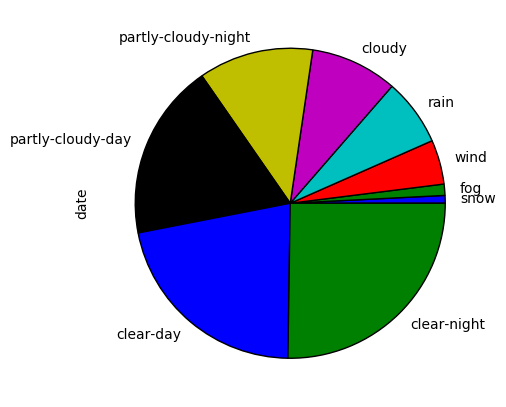

In [121]:
weather_pd.groupby('icon').count()['date'].sort_values().plot(kind = 'pie',sort_columns='date',figsize = (5,5))

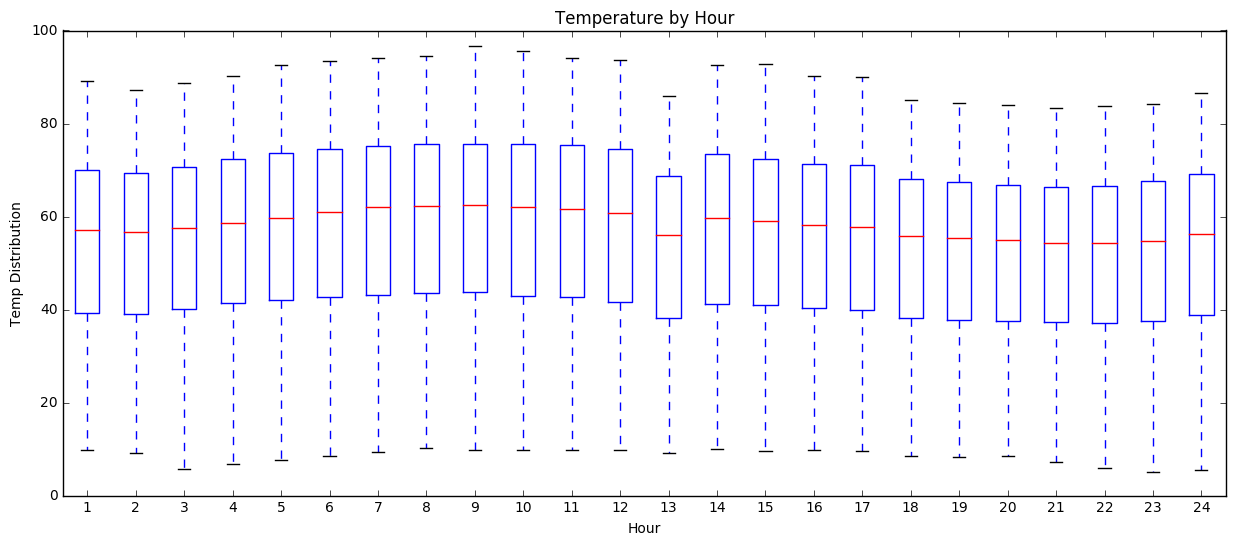

In [103]:
ax = weather_pd[['hour','temp']].pivot(columns = 'hour').plot.box(figsize = (15,6), 
                                                                  title = 'Temperature by Hour')
ax.set_xticklabels(range(1,25))
ax.set_xlabel("Hour")
ax.set_ylabel("Temp Distribution")